## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  70.394292   788.022933  0.168515   2.967518  150.159887
1  73.953153   572.479100  0.862436  10.543023  499.178462
2  45.543157  1476.259453  0.029805   9.560882   63.315388
3  53.904327   938.842110  0.982114  10.724538  923.678024
4  25.231060   254.870911  0.951753   6.578775  243.868580


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897


0:	learn: 0.9575259	total: 56.2ms	remaining: 56.2s
1:	learn: 0.9444389	total: 56.8ms	remaining: 28.3s
2:	learn: 0.9335747	total: 57.6ms	remaining: 19.2s
3:	learn: 0.9224489	total: 58.2ms	remaining: 14.5s
4:	learn: 0.9085476	total: 58.6ms	remaining: 11.7s
5:	learn: 0.8968403	total: 59.1ms	remaining: 9.8s
6:	learn: 0.8836445	total: 59.6ms	remaining: 8.45s
7:	learn: 0.8714538	total: 60.1ms	remaining: 7.45s
8:	learn: 0.8595217	total: 60.5ms	remaining: 6.67s
9:	learn: 0.8476996	total: 61.1ms	remaining: 6.05s
10:	learn: 0.8354969	total: 61.6ms	remaining: 5.54s
11:	learn: 0.8243967	total: 62.1ms	remaining: 5.11s
12:	learn: 0.8121766	total: 62.5ms	remaining: 4.75s
13:	learn: 0.8023509	total: 62.9ms	remaining: 4.43s
14:	learn: 0.7920781	total: 63.3ms	remaining: 4.16s
15:	learn: 0.7819486	total: 63.8ms	remaining: 3.92s
16:	learn: 0.7723992	total: 64.3ms	remaining: 3.72s
17:	learn: 0.7660884	total: 64.8ms	remaining: 3.53s
18:	learn: 0.7555713	total: 65.2ms	remaining: 3.37s
19:	learn: 0.7452691	to

237:	learn: 0.0893619	total: 168ms	remaining: 538ms
238:	learn: 0.0887590	total: 169ms	remaining: 537ms
239:	learn: 0.0880155	total: 169ms	remaining: 535ms
240:	learn: 0.0874741	total: 169ms	remaining: 534ms
241:	learn: 0.0867619	total: 170ms	remaining: 532ms
242:	learn: 0.0862342	total: 170ms	remaining: 531ms
243:	learn: 0.0857169	total: 171ms	remaining: 529ms
244:	learn: 0.0852873	total: 171ms	remaining: 528ms
245:	learn: 0.0847426	total: 172ms	remaining: 526ms
246:	learn: 0.0841644	total: 172ms	remaining: 525ms
247:	learn: 0.0836377	total: 173ms	remaining: 523ms
248:	learn: 0.0830334	total: 173ms	remaining: 522ms
249:	learn: 0.0826108	total: 173ms	remaining: 520ms
250:	learn: 0.0820018	total: 174ms	remaining: 519ms
251:	learn: 0.0813816	total: 174ms	remaining: 518ms
252:	learn: 0.0808436	total: 175ms	remaining: 516ms
253:	learn: 0.0803574	total: 175ms	remaining: 515ms
254:	learn: 0.0799091	total: 176ms	remaining: 514ms
255:	learn: 0.0795221	total: 176ms	remaining: 512ms
256:	learn: 

347:	learn: 0.0470366	total: 219ms	remaining: 411ms
348:	learn: 0.0468033	total: 220ms	remaining: 410ms
349:	learn: 0.0465069	total: 220ms	remaining: 409ms
350:	learn: 0.0463137	total: 221ms	remaining: 408ms
351:	learn: 0.0459846	total: 221ms	remaining: 407ms
352:	learn: 0.0456547	total: 222ms	remaining: 407ms
353:	learn: 0.0454157	total: 222ms	remaining: 406ms
354:	learn: 0.0452469	total: 223ms	remaining: 405ms
355:	learn: 0.0449308	total: 224ms	remaining: 404ms
356:	learn: 0.0447006	total: 224ms	remaining: 404ms
357:	learn: 0.0443620	total: 225ms	remaining: 403ms
358:	learn: 0.0441839	total: 225ms	remaining: 402ms
359:	learn: 0.0440067	total: 226ms	remaining: 401ms
360:	learn: 0.0437466	total: 226ms	remaining: 400ms
361:	learn: 0.0435262	total: 227ms	remaining: 399ms
362:	learn: 0.0433599	total: 227ms	remaining: 398ms
363:	learn: 0.0431575	total: 227ms	remaining: 397ms
364:	learn: 0.0429408	total: 228ms	remaining: 397ms
365:	learn: 0.0426511	total: 228ms	remaining: 396ms
366:	learn: 

502:	learn: 0.0236577	total: 302ms	remaining: 298ms
503:	learn: 0.0235598	total: 302ms	remaining: 297ms
504:	learn: 0.0233877	total: 303ms	remaining: 297ms
505:	learn: 0.0233477	total: 303ms	remaining: 296ms
506:	learn: 0.0231797	total: 303ms	remaining: 295ms
507:	learn: 0.0230855	total: 304ms	remaining: 295ms
508:	learn: 0.0230462	total: 305ms	remaining: 294ms
509:	learn: 0.0228828	total: 305ms	remaining: 293ms
510:	learn: 0.0227460	total: 305ms	remaining: 292ms
511:	learn: 0.0227073	total: 306ms	remaining: 292ms
512:	learn: 0.0226523	total: 306ms	remaining: 291ms
513:	learn: 0.0225193	total: 307ms	remaining: 290ms
514:	learn: 0.0224815	total: 307ms	remaining: 289ms
515:	learn: 0.0224443	total: 308ms	remaining: 289ms
516:	learn: 0.0223145	total: 308ms	remaining: 288ms
517:	learn: 0.0222619	total: 309ms	remaining: 288ms
518:	learn: 0.0222255	total: 310ms	remaining: 287ms
519:	learn: 0.0220994	total: 310ms	remaining: 286ms
520:	learn: 0.0220076	total: 311ms	remaining: 286ms
521:	learn: 

604:	learn: 0.0158486	total: 352ms	remaining: 230ms
605:	learn: 0.0157983	total: 353ms	remaining: 229ms
606:	learn: 0.0157251	total: 354ms	remaining: 229ms
607:	learn: 0.0156760	total: 354ms	remaining: 228ms
608:	learn: 0.0155908	total: 354ms	remaining: 228ms
609:	learn: 0.0155759	total: 355ms	remaining: 227ms
610:	learn: 0.0155404	total: 355ms	remaining: 226ms
611:	learn: 0.0154696	total: 356ms	remaining: 225ms
612:	learn: 0.0154350	total: 356ms	remaining: 225ms
613:	learn: 0.0154052	total: 357ms	remaining: 224ms
614:	learn: 0.0153717	total: 357ms	remaining: 223ms
615:	learn: 0.0153025	total: 357ms	remaining: 223ms
616:	learn: 0.0152698	total: 358ms	remaining: 222ms
617:	learn: 0.0152410	total: 358ms	remaining: 221ms
618:	learn: 0.0152118	total: 359ms	remaining: 221ms
619:	learn: 0.0151443	total: 359ms	remaining: 220ms
620:	learn: 0.0151132	total: 360ms	remaining: 220ms
621:	learn: 0.0150471	total: 360ms	remaining: 219ms
622:	learn: 0.0150168	total: 361ms	remaining: 218ms
623:	learn: 

837:	learn: 0.0070860	total: 465ms	remaining: 90ms
838:	learn: 0.0070740	total: 466ms	remaining: 89.4ms
839:	learn: 0.0070442	total: 466ms	remaining: 88.9ms
840:	learn: 0.0070334	total: 467ms	remaining: 88.3ms
841:	learn: 0.0070062	total: 467ms	remaining: 87.7ms
842:	learn: 0.0069957	total: 468ms	remaining: 87.1ms
843:	learn: 0.0069853	total: 468ms	remaining: 86.6ms
844:	learn: 0.0069585	total: 469ms	remaining: 86ms
845:	learn: 0.0069472	total: 469ms	remaining: 85.4ms
846:	learn: 0.0069370	total: 470ms	remaining: 84.8ms
847:	learn: 0.0069108	total: 470ms	remaining: 84.3ms
848:	learn: 0.0068998	total: 471ms	remaining: 83.7ms
849:	learn: 0.0068898	total: 471ms	remaining: 83.2ms
850:	learn: 0.0068643	total: 472ms	remaining: 82.6ms
851:	learn: 0.0068259	total: 472ms	remaining: 82.1ms
852:	learn: 0.0068013	total: 473ms	remaining: 81.5ms
853:	learn: 0.0067873	total: 473ms	remaining: 80.9ms
854:	learn: 0.0067502	total: 474ms	remaining: 80.4ms
855:	learn: 0.0067217	total: 475ms	remaining: 79.8

909:	learn: 0.0055869	total: 502ms	remaining: 49.6ms
910:	learn: 0.0055717	total: 502ms	remaining: 49.1ms
911:	learn: 0.0055494	total: 503ms	remaining: 48.5ms
912:	learn: 0.0055279	total: 503ms	remaining: 47.9ms
913:	learn: 0.0055084	total: 504ms	remaining: 47.4ms
914:	learn: 0.0054994	total: 504ms	remaining: 46.8ms
915:	learn: 0.0054930	total: 505ms	remaining: 46.3ms
916:	learn: 0.0054720	total: 505ms	remaining: 45.7ms
917:	learn: 0.0054631	total: 506ms	remaining: 45.2ms
918:	learn: 0.0054569	total: 506ms	remaining: 44.6ms
919:	learn: 0.0054482	total: 507ms	remaining: 44.1ms
920:	learn: 0.0054420	total: 507ms	remaining: 43.5ms
921:	learn: 0.0054359	total: 508ms	remaining: 42.9ms
922:	learn: 0.0054154	total: 508ms	remaining: 42.4ms
923:	learn: 0.0053736	total: 508ms	remaining: 41.8ms
924:	learn: 0.0053651	total: 509ms	remaining: 41.3ms
925:	learn: 0.0053591	total: 509ms	remaining: 40.7ms
926:	learn: 0.0053402	total: 510ms	remaining: 40.1ms
927:	learn: 0.0052996	total: 510ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

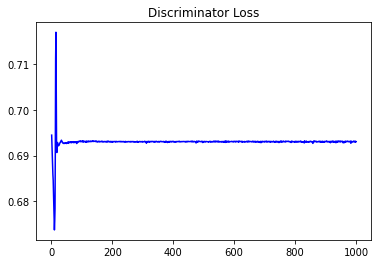

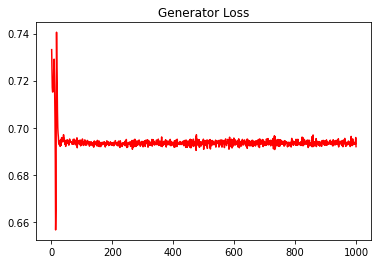

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.030690839440806677


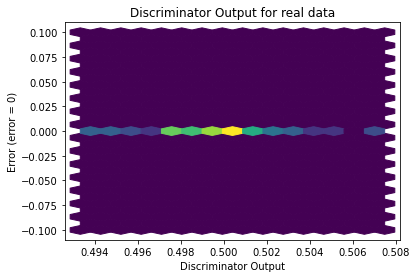

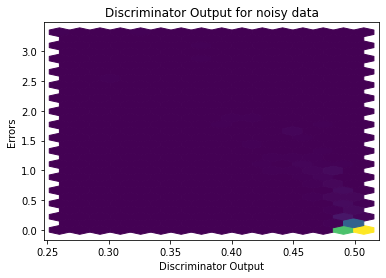

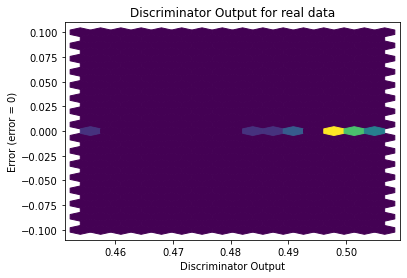

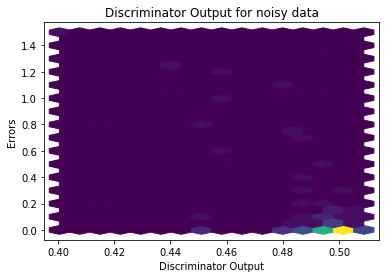

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


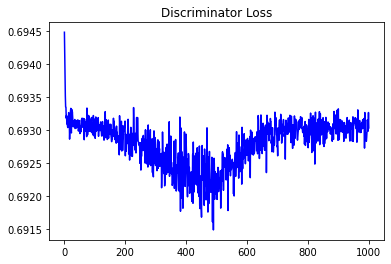

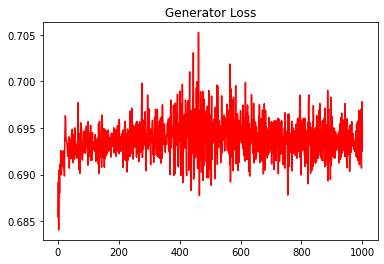

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03925938735753314


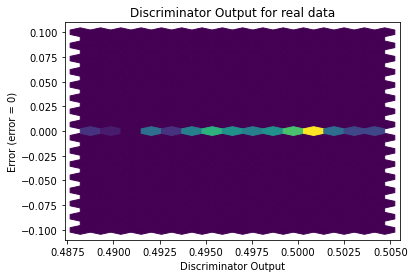

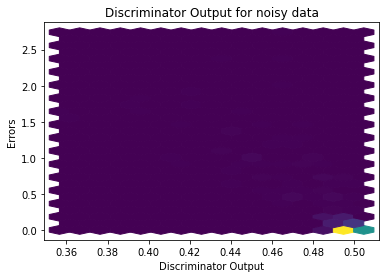

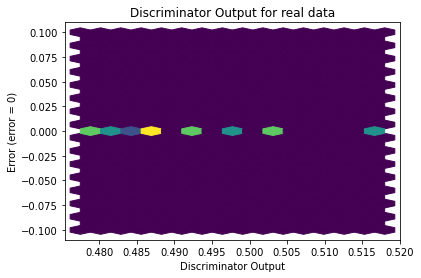

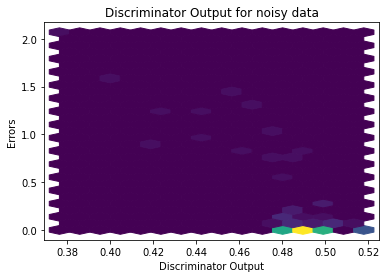

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1534]], requires_grad=True)
